In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='Gill Sans MT')

In [5]:
cd Documents/github/housing_stats/

[WinError 3] The system cannot find the path specified: 'Documents/github/housing_stats/'
c:\Users\mmak\Documents\GitHub\housing_stats


In [6]:
cal_high = pd.read_csv('data//pop//2020-2046-09-census-divisions-population-projections-high.csv')
cal_med = pd.read_csv('data//pop/2020-2046-07-census-divisions-population-projections-medium.csv')
cal_low = pd.read_csv('data//pop//2020-2046-05-census-divisions-population-projections-low.csv')

In [7]:
al_high = cal_high[cal_high['Region']=='Alberta']
al_med = cal_med[cal_med['Region']=='Alberta']
al_low = cal_low[cal_low['Region']=='Alberta']

In [8]:
cal_high = cal_high[cal_high['Region']=='6']
cal_med = cal_med[cal_med['Region']=='6']
cal_low = cal_low[cal_low['Region']=='6']

cal_high.index = cal_high['Year']
cal_med.index = cal_med['Year']
cal_low.index = cal_low['Year']


In [13]:
# sex == 3 <- male + female 
cal_high_all=cal_high[((cal_high['Age']=='Total') & (cal_high['Sex']==3))]
cal_low_all=cal_low[((cal_low['Age']=='Total') & (cal_low['Sex']==3))]

<AxesSubplot:xlabel='Year', ylabel='Pop'>

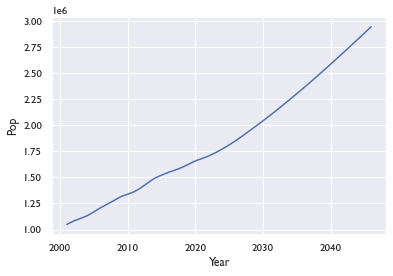

In [14]:
sns.lineplot(x=cal_low_all.Year,y=cal_high_all.Pop)

In [15]:
cal_med_all = cal_med[((cal_med['Age']=='Total') & (cal_med['Sex']==3))]
cal_low_all = cal_low[((cal_low['Age']=='Total') & (cal_low['Sex']==3))]

In [18]:
cal_all

,Pop,Pop,Pop,Pop
Year,,,,
2001,1049059.0,NaN,NaN,NaN
2002,1081450.0,NaN,NaN,NaN
2003,1105613.0,NaN,NaN,NaN
2004,1131524.0,NaN,NaN,NaN
2005,1169252.0,NaN,NaN,NaN
2006,1208971.0,NaN,NaN,NaN
2007,1243482.0,NaN,NaN,NaN
2008,1279058.0,NaN,NaN,NaN
2009,1315602.0,NaN,NaN,NaN


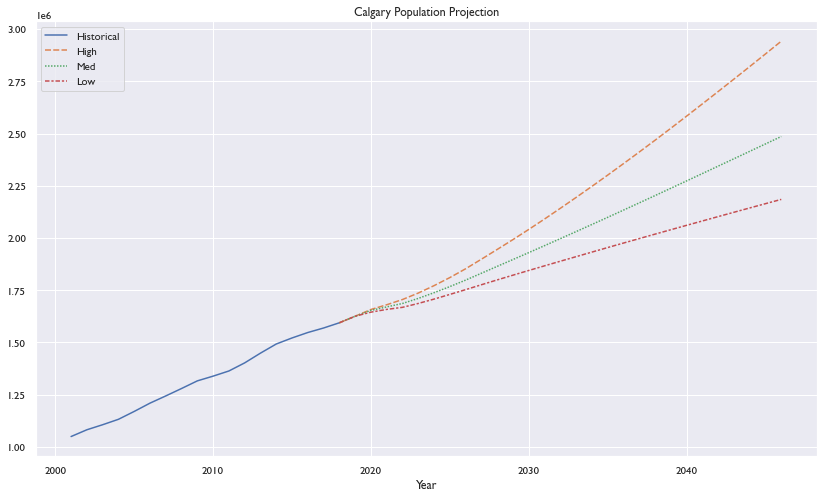

In [19]:
fig, ax = plt.subplots(figsize=(14,8))
cal_all = pd.DataFrame([cal_high_all.loc[:'2018','Pop'],
                        cal_high_all.loc['2018':,'Pop'],
                        cal_med_all.loc['2018':,'Pop'],
                        cal_low_all.loc['2018':,'Pop'], 
                        ])
cal_all=cal_all.T
cal_all.columns=['Historical','High','Med','Low']
sns.lineplot(data = cal_all,ax=ax)
ax.set_title('Calgary Population Projection')
plt.savefig('population.png')

<AxesSubplot:>

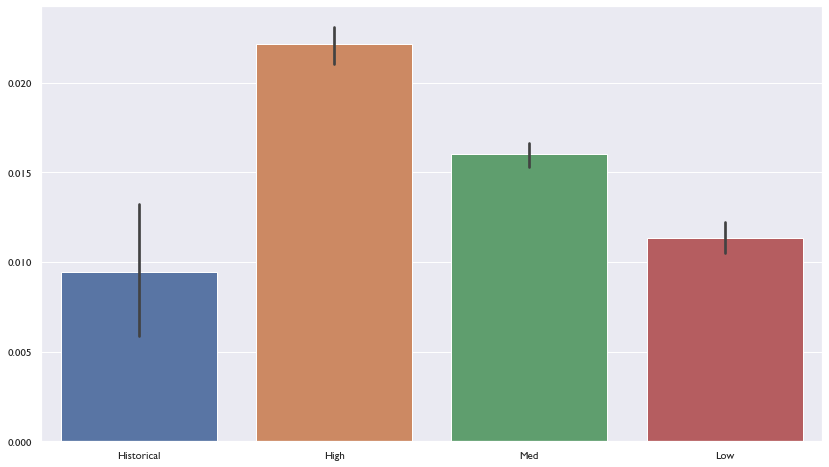

In [20]:
fig, ax2 = plt.subplots(figsize=(14,8))

cal_pct = cal_all.pct_change()
cal_pct.columns=['Historical','High','Med','Low']
sns.barplot(data=cal_pct)

In [21]:
cal_pct['Year']= cal_pct.index

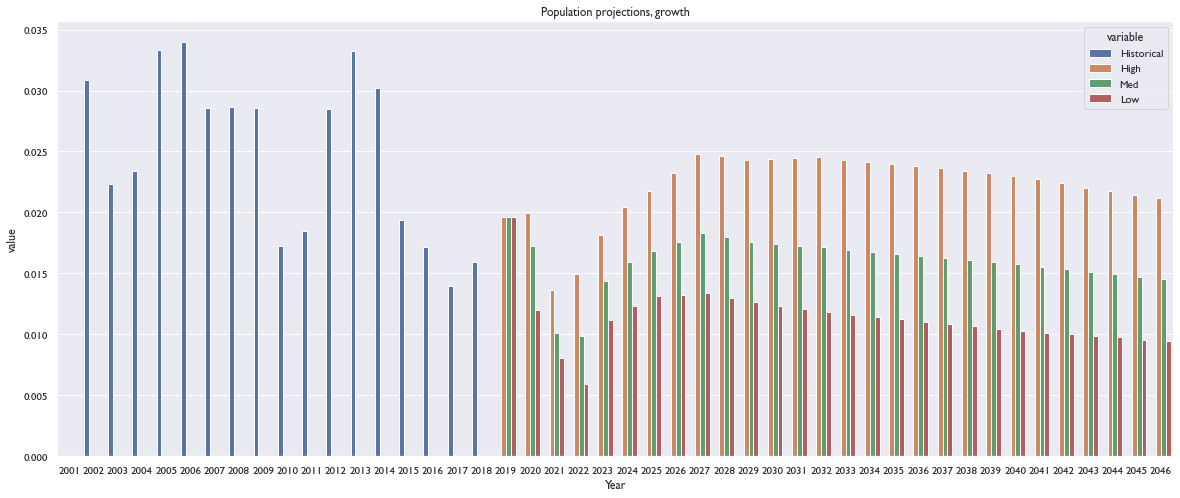

In [22]:
fig, ax2 = plt.subplots(figsize=(20,8))

sns.barplot(data=pd.melt(cal_pct, id_vars=['Year']),hue='variable',x='Year',y='value')
ax2.set_title('Population projections, growth')
plt.savefig('pop_pct_change.png')

<AxesSubplot:xlabel='Year'>

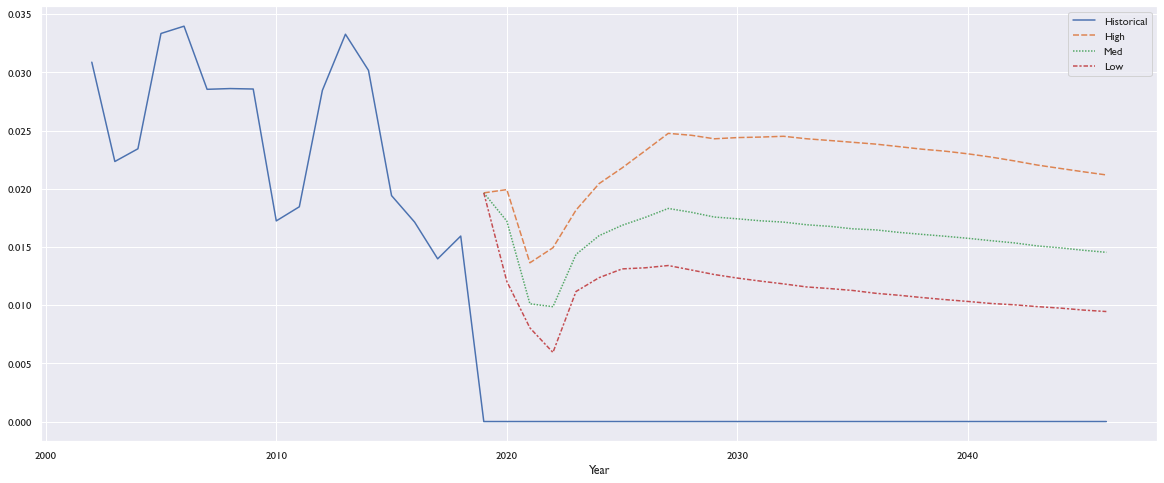

In [23]:
fig, ax3 = plt.subplots(figsize=(20,8))

sns.lineplot(data = cal_pct.drop('Year',axis=1),ax=ax3)

In [24]:
cal_med_sample = cal_med[cal_med['Age']!='Total']
cal_data = cal_med_sample[cal_med_sample['Sex']!=3]
cal_data['Year']

Year
2001    2001
2001    2001
2001    2001
2001    2001
2001    2001
        ... 
2046    2046
2046    2046
2046    2046
2046    2046
2046    2046
Name: Year, Length: 8372, dtype: int64

In [25]:
%matplotlib inline


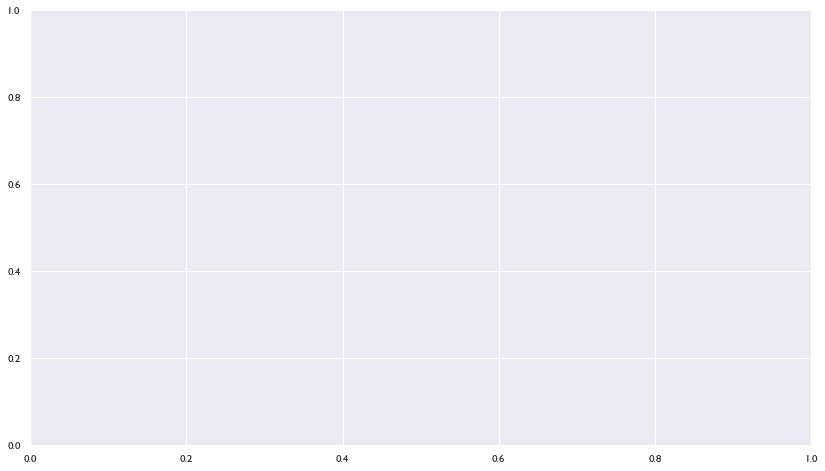

In [26]:
import matplotlib.animation as animation
fig, ax4 = plt.subplots(figsize=(14,8))


def animate(i):
    data = cal_data[cal_data['Year']==int(i)+2001]
    data.replace(to_replace='90+', value=90,inplace=True)
    data=data.astype({'Age':'int32'})
    bins =pd.cut(data['Age'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
    data.groupby(bins)['Pop'].sum().plot(kind='barh', title = 'Population Year: ' + str(i+2001))

ani = animation.FuncAnimation(fig,animate,frames=20,interval=5,repeat=True)

In [30]:
data.replace(to_replace='90+', value=90,inplace=True)
data.astype({'Age':'int32'}).dtypes

NameError: name 'data' is not defined

In [31]:
data=data.astype({'Age':'int32'})

NameError: name 'data' is not defined

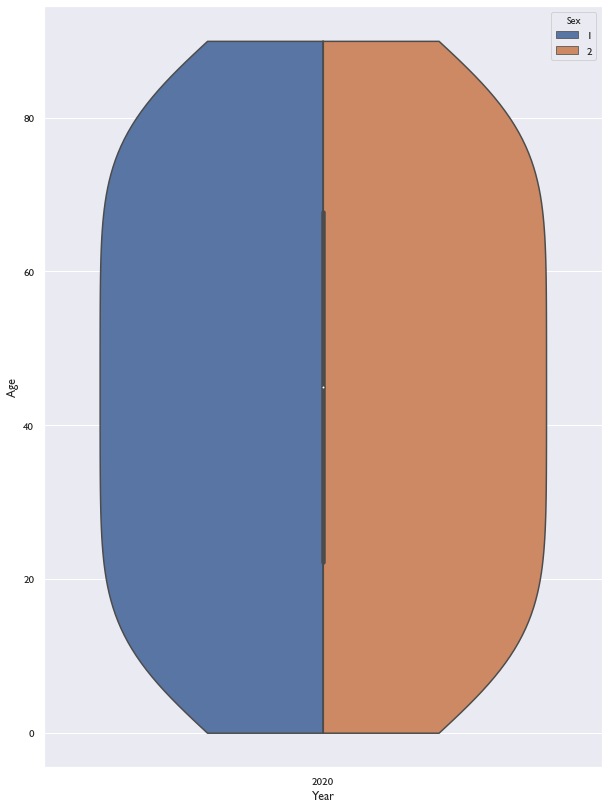

In [32]:
fig, ax4 = plt.subplots(figsize=(10,14))
data = cal_data[cal_data['Year']==2020]
data.replace(to_replace='90+', value=90,inplace=True)
data=data.astype({'Age':'int32'})
sns.violinplot(x='Year',y='Age', hue = 'Sex', split=True,data=data, ax=ax4, bw='scott', cut=0)

In [33]:
bins =pd.cut(data['Age'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])

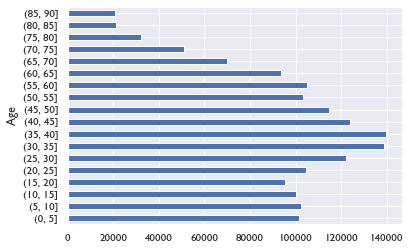

In [34]:
data.groupby(bins)['Pop'].sum().plot(kind='barh')

In [35]:
data

,Year,Region,Sex,Age,Pop
Year,,,,,
2020,2020,6,1,0,10515
2020,2020,6,1,1,10525
2020,2020,6,1,2,10350
2020,2020,6,1,3,10360
2020,2020,6,1,4,10515
...,...,...,...,...,...
2020,2020,6,2,86,1835
2020,2020,6,2,87,1705
2020,2020,6,2,88,1570


In [1]:
from stats_can import StatsCan
sc = StatsCan()

sc.update_tables()
#population demographic estimates
df = sc.table_to_df("17-10-0135-01")

In [25]:
calgary = df[df['GEO']=='Calgary (CMA), Alberta'].set_index('REF_DATE')

In [30]:
youth = calgary[(calgary['Age group']=='15 to 19 years')&(calgary['Sex']=='Both sexes')]['VALUE'] + calgary[(calgary['Age group']=='20 to 24 years')&(calgary['Sex']=='Both sexes')]['VALUE']

In [32]:
youth

REF_DATE
2006-01-01    165327.0
2007-01-01    168735.0
2008-01-01    170807.0
2009-01-01    171385.0
2010-01-01    169518.0
2011-01-01    169596.0
2012-01-01    171023.0
2013-01-01    173826.0
2014-01-01    176095.0
2015-01-01    174888.0
2016-01-01    174328.0
2017-01-01    173877.0
2018-01-01    175302.0
2019-01-01    178778.0
Name: VALUE, dtype: float64

In [33]:
all_pop = calgary[(calgary['Age group']=='All ages')&(calgary['Sex']=='Both sexes')]

In [36]:
youth/all_pop['VALUE']

REF_DATE
2006-01-01    0.146994
2007-01-01    0.146020
2008-01-01    0.143840
2009-01-01    0.140399
2010-01-01    0.136651
2011-01-01    0.134181
2012-01-01    0.131527
2013-01-01    0.129269
2014-01-01    0.126977
2015-01-01    0.123682
2016-01-01    0.121216
2017-01-01    0.119155
2018-01-01    0.118129
2019-01-01    0.118027
Name: VALUE, dtype: float64